<a href="https://colab.research.google.com/github/alaa-alt/ITI/blob/main/Machine_Learning_I/Coding_perceptron_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [ ]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 8.07 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/perceptron_algorithm


In [ ]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [ ]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

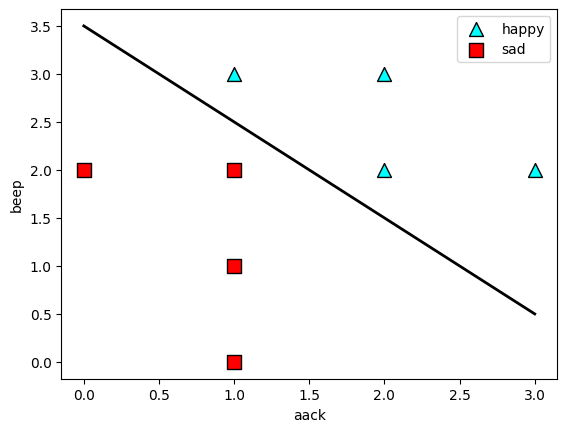

In [ ]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [ ]:
def step(x):
    ## TODO ##
    # implement step function
    if x<0:
      output = 0
    elif x>=0:
      output = 1

    return output

def score(weights, bias, features):
    ## TODO ##
    # implement score calculation
    output= np.dot(weights, features) + bias

    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions
    output = step(score(weights, bias, features))
    return output

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    y = label
    y_pred = prediction(weights, bias, features)
    if y == y_pred:
      output = 0
    elif y != y_pred:
      output = abs(score(weights, bias, features))

    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [ ]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    y_pred = prediction(weights, bias, features)
    y = label
    weights = weights + learning_rate*(y-y_pred)*features
    bias = bias + learning_rate*(y-y_pred)

    return weights, bias

### Running the perceptron algorithm

In [ ]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias
    # append mean mean_perceptron_error in the errors list after each epoch
    for epoch in range(epochs):
      i = random.randint(0, len(features)-1)
      x_train = features[i]
      y_train = labels[i]
      weights, bias = perceptron_trick(weights, bias, x_train,y_train, learning_rate)
      mse = mean_perceptron_error(weights,bias, features, labels)
      errors.append(mse)

    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

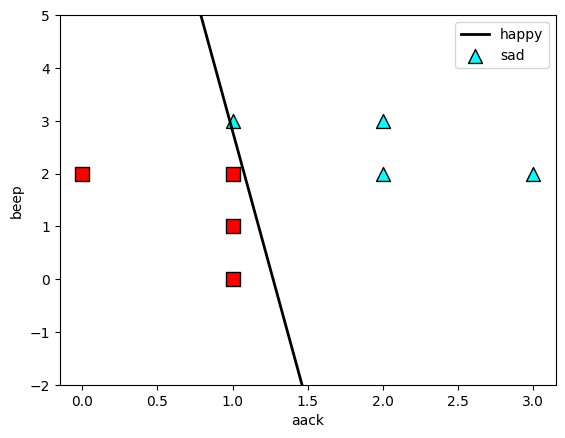

(array([0.52, 0.05]), -0.6600000000000004)

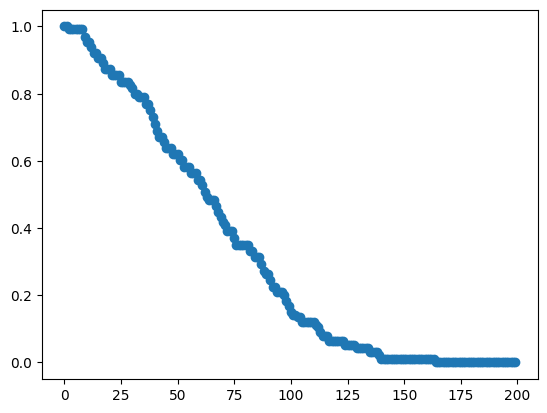

In [ ]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [ ]:
from sklearn.linear_model import SGDClassifier
## TODO ##
# choose loss to be "perceptron" and tol = None
clf= SGDClassifier(loss="perceptron", tol=None)
clf.fit(features, labels)

SGDClassifier(loss='perceptron', tol=None)

In [ ]:
clf.score(features, labels)

1.0

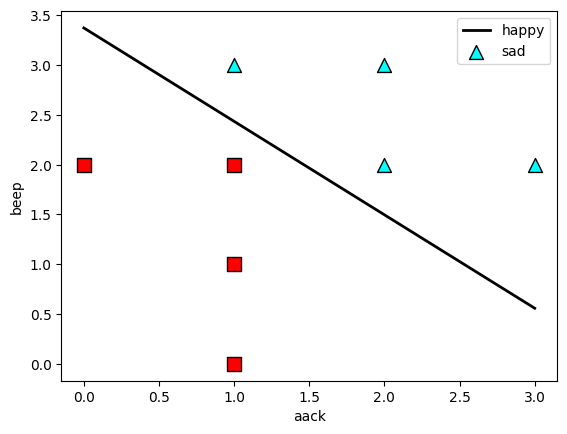

In [ ]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()